In [1]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

In [2]:
# General imports
import os
import tensorflow as tf
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-08-02 06:42:11.407771: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-08-02 06:42:11.433809: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-08-02 06:42:11.433984: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-08-02 06:42:11.435301: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-08-02 06:42:11.436959: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-08-02 06:42:11.437208: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

# Scratch

## Test 0

In [4]:
num = 0
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

filestr = 'models/multivariate/scratch/set_{}'.format(num)
bce_filestr = filestr + '/bce/model_{}.h5'
mse_filestr = filestr + '/mse/model_{}.h5'
mlc_filestr = filestr + '/mlc/model_{}.h5'
sqr_filestr = filestr + '/sqr/model_{}.h5'

In [5]:
data, m, s = make_data(bkgd, sgnl, N)

In [6]:
X_train, X_test, y_train, y_test = data

In [8]:
len(X_train), len(X_test)

(1500000, 500000)

In [5]:
data, m, s = make_data(bkgd, sgnl, N)
np.save(filestr + '/m.npy', m)
np.save(filestr + '/s.npy', s)

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

0


2022-07-29 18:48:40.445791: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-07-29 18:48:40.460212: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2994530000 Hz
2022-07-29 18:48:40.461361: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56428bf85ee0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-29 18:48:40.461390: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-07-29 18:48:40.592253: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56428bfefdd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-07-29 18:48:40.592305: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2022-07-29 18:48:40.594137: I 

0.6883618831634521 	 27	
0.24762150645256042 	 14	
-0.009552852250635624 	 24	
0.9952173829078674 	 14	


1
0.688380241394043 	 13	
0.24761496484279633 	 14	
-0.009603092446923256 	 31	
0.9951896667480469 	 19	


2
0.6883213520050049 	 13	
0.24763500690460205 	 23	
-0.009643911384046078 	 14	
0.9951586127281189 	 12	


3
0.6883757710456848 	 14	
0.24760662019252777 	 20	
-0.009583057835698128 	 13	
0.9951493740081787 	 14	


4
0.6883878707885742 	 15	
0.2476055771112442 	 13	
-0.009636257775127888 	 16	
0.9952188730239868 	 14	


5
0.6883962750434875 	 14	
0.2475866824388504 	 14	
-0.009465595707297325 	 14	
0.9951909780502319 	 16	


6
0.6883500814437866 	 12	
0.24759794771671295 	 12	
-0.009551728144288063 	 14	
0.9951901435852051 	 15	


7
0.6883389949798584 	 14	
0.2476010024547577 	 12	
-0.00967998243868351 	 15	
0.9951764345169067 	 23	


8
0.6883091926574707 	 13	
0.24761265516281128 	 12	
-0.009604083374142647 	 14	
0.995224118232727 	 24	


9
0.6883280277252197 	 14	
0.2476094

## Test 1

In [6]:
num = 1
reps = 100
N = 10**6

b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

filestr = 'models/multivariate/scratch/set_' + str(num)
bce_filestr = filestr + '/bce/model_{}.h5'
mse_filestr = filestr + '/mse/model_{}.h5'
mlc_filestr = filestr + '/mlc/model_{}.h5'
sqr_filestr = filestr + '/sqr/model_{}.h5'

In [7]:
data, m, s = make_data(bkgd, sgnl, N)
np.save(filestr + '/m.npy', m)
np.save(filestr + '/s.npy', s)

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

0
0.6881998777389526 	 15	
0.2475435584783554 	 13	
-0.009870346635580063 	 13	
0.995040237903595 	 12	


1
0.6882941126823425 	 12	
0.24752333760261536 	 11	
-0.009925206191837788 	 15	
0.9950826168060303 	 13	


2
0.6881731152534485 	 16	
0.24754278361797333 	 12	
-0.009884728118777275 	 12	
0.9950234293937683 	 12	


3
0.6881704330444336 	 13	
0.24753686785697937 	 23	
-0.010014007799327374 	 12	
0.9949740171432495 	 12	


4
0.6882191300392151 	 15	
0.24752846360206604 	 12	
-0.009721234440803528 	 14	
0.9950057864189148 	 12	


5
0.6881936192512512 	 11	
0.2475195676088333 	 25	
-0.009933524765074253 	 16	
0.9950420260429382 	 20	


6
0.688209056854248 	 12	
0.2475593239068985 	 16	
-0.009952276013791561 	 16	
0.9950533509254456 	 12	


7
0.6882439255714417 	 17	
0.24759100377559662 	 12	
-0.009951851330697536 	 17	
0.9950884580612183 	 23	


8
0.6881672143936157 	 13	
0.24753499031066895 	 13	
-0.009922990575432777 	 12	
0.9950391054153442 	 12	


9
0.6881956458091736 	 12	
0.2475

## Test 2

In [8]:
num = 2
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

filestr = 'models/multivariate/scratch/set_' + str(num)
bce_filestr = filestr + '/bce/model_{}.h5'
mse_filestr = filestr + '/mse/model_{}.h5'
mlc_filestr = filestr + '/mlc/model_{}.h5'
sqr_filestr = filestr + '/sqr/model_{}.h5'

In [9]:
data, m, s = make_data(bkgd, sgnl, N)
np.save(filestr + '/m.npy', m)
np.save(filestr + '/s.npy', s)

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

0
0.6375541687011719 	 16	
0.22467152774333954 	 17	
-0.09919217228889465 	 18	
0.9407537579536438 	 19	


1
0.6390477418899536 	 15	
0.2246038019657135 	 17	
-0.09971578419208527 	 26	
0.9409674406051636 	 18	


2
0.6381902098655701 	 17	
0.22471153736114502 	 13	
-0.09993746876716614 	 17	
0.9414637684822083 	 23	


3
0.6383682489395142 	 17	
0.224787175655365 	 17	
-0.09985955059528351 	 16	
0.9413660168647766 	 18	


4
0.6381939649581909 	 17	
0.22458823025226593 	 21	
-0.09970392286777496 	 18	
0.9414353370666504 	 16	


5
0.6385173797607422 	 16	
0.22475972771644592 	 14	
-0.10002212971448898 	 16	
0.9409471154212952 	 18	


6
0.6375872492790222 	 16	
0.22446618974208832 	 18	
-0.09926441311836243 	 17	
0.9419072270393372 	 16	


7
0.6389512419700623 	 18	
0.22454190254211426 	 15	
-0.0992928221821785 	 42	
0.9414518475532532 	 16	


8
0.6376802325248718 	 16	
0.2246801108121872 	 18	
-0.0992213636636734 	 28	
0.9415695071220398 	 23	


9
0.6379645466804504 	 16	
0.22479756176471

## Test 3

In [10]:
num = 3
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

filestr = 'models/multivariate/scratch/set_' + str(num)
bce_filestr = filestr + '/bce/model_{}.h5'
mse_filestr = filestr + '/mse/model_{}.h5'
mlc_filestr = filestr + '/mlc/model_{}.h5'
sqr_filestr = filestr + '/sqr/model_{}.h5'

In [11]:
data, m, s = make_data(bkgd, sgnl, N)
np.save(filestr + '/m.npy', m)
np.save(filestr + '/s.npy', s)

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

0
0.6378833055496216 	 34	
0.22499577701091766 	 30	
-0.12593060731887817 	 22	
0.9409141540527344 	 34	


1
0.6377645134925842 	 31	
0.22493574023246765 	 43	
-0.1268656998872757 	 30	
0.9409898519515991 	 35	


2
0.6379557847976685 	 31	
0.22491775453090668 	 34	
-0.1264166384935379 	 26	
0.9410181641578674 	 28	


3
0.637931764125824 	 24	
0.2250019758939743 	 37	
-0.12490515410900116 	 30	
0.9409837126731873 	 38	


4
0.6377822756767273 	 28	
0.22490940988063812 	 33	
-0.1258268803358078 	 26	
0.940990686416626 	 29	


5
0.6378023624420166 	 42	
0.22494959831237793 	 29	
-0.1259046047925949 	 22	
0.9409587383270264 	 27	


6
0.6380489468574524 	 31	
0.2249186933040619 	 50	
-0.12686483561992645 	 28	
0.9411768913269043 	 33	


7
0.6378064155578613 	 35	
0.22498150169849396 	 38	
-0.12568672001361847 	 26	
0.9412409663200378 	 45	


8
0.6377880573272705 	 35	
0.22492022812366486 	 33	
-0.126896932721138 	 29	
0.940970778465271 	 38	


9
0.6380754709243774 	 32	
0.22499611973762512 	

## Test 4

In [12]:
num = 4
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

filestr = 'models/multivariate/scratch/set_' + str(num)
bce_filestr = filestr + '/bce/model_{}.h5'
mse_filestr = filestr + '/mse/model_{}.h5'
mlc_filestr = filestr + '/mlc/model_{}.h5'
sqr_filestr = filestr + '/sqr/model_{}.h5'

In [13]:
data, m, s = make_data(bkgd, sgnl, N)
np.save(filestr + '/m.npy', m)
np.save(filestr + '/s.npy', s)

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

0
0.6757964491844177 	 31	
0.24156133830547333 	 23	
-0.036860138177871704 	 25	
0.9819831252098083 	 22	


1
0.6755930781364441 	 30	
0.24160625040531158 	 22	
-0.03685247525572777 	 19	
0.9822545051574707 	 17	


2
0.6757091283798218 	 20	
0.24166902899742126 	 31	
-0.03640149161219597 	 21	
0.9819740653038025 	 21	


3
0.6757434606552124 	 17	
0.24162040650844574 	 19	
-0.03651285916566849 	 23	
0.9821041226387024 	 19	


4
0.6757324934005737 	 23	
0.24153687059879303 	 20	
-0.03620560094714165 	 20	
0.9821851253509521 	 23	


5
0.6757504940032959 	 21	
0.2415396124124527 	 27	
-0.03665713220834732 	 25	
0.9821774959564209 	 20	


6
0.6754447221755981 	 25	
0.24151134490966797 	 29	
-0.03702163323760033 	 31	
0.9821192622184753 	 22	


7
0.6756078600883484 	 21	
0.24159404635429382 	 29	
-0.03694736212491989 	 22	
0.9821195006370544 	 20	


8
0.6755854487419128 	 20	
0.2415885329246521 	 24	
-0.03653782978653908 	 25	
0.9820698499679565 	 22	


9
0.6756822466850281 	 24	
0.241649135

# Performance

In [77]:
reps = 100

bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

In [78]:
g = np.meshgrid(np.linspace(-2, 2, 401), np.linspace(-2, 2, 401))
g = np.append(g[0].reshape(-1, 1), g[1].reshape(-1, 1), axis = 1)

aa, bb = np.meshgrid(np.linspace(-2.005, 2.005, 402), np.linspace(-2.005, 2.005, 402))

In [79]:
h = np.meshgrid(np.linspace(-6, 6, 601), np.linspace(-6, 6, 601))
h = np.append(g[0].reshape(-1, 1), g[1].reshape(-1, 1), axis = 1)

In [80]:
x = np.linspace(-2, 2, 4001)
y = np.linspace(-2, 2, 4001)
xx, yy = np.meshgrid(x, y)

pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

## Test 0

### Load

In [81]:
num = 0
N = 10**6

mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

filestr = 'models/multivariate/scratch/set_' + str(num)
bce_filestr = filestr + '/bce/model_{}.h5'
mse_filestr = filestr + '/mse/model_{}.h5'
mlc_filestr = filestr + '/mlc/model_{}.h5'
sqr_filestr = filestr + '/sqr/model_{}.h5'

m = np.load(filestr + '/m.npy')
s = np.load(filestr + '/s.npy')

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model, m, s)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model, m, s)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model, m, s)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model, m, s)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

In [82]:
min(lr(h)), max(lr(h))

(0.6703200460356391, 0.6703200460356391)

### MAE

In [18]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.010924828827341464
MSE:	 0.01069093969457705
MLC:	 0.010997438996599657
SQR:	 0.010864346686311066


### Plots

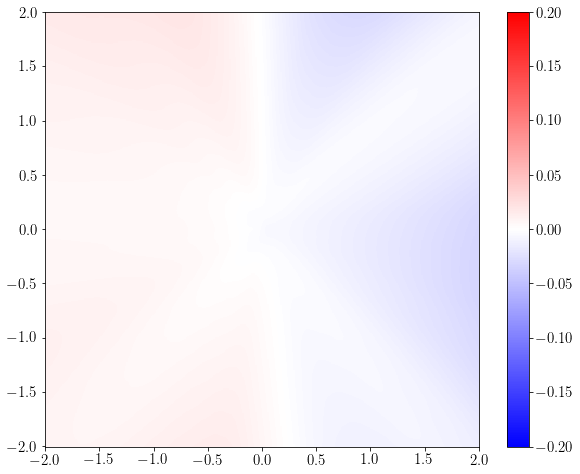

In [83]:
plt.figure(figsize = (10, 8))
avg_bce = avg_lr(get_preds(bce_lrs, xs = g))[0]
dd = (avg_bce - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

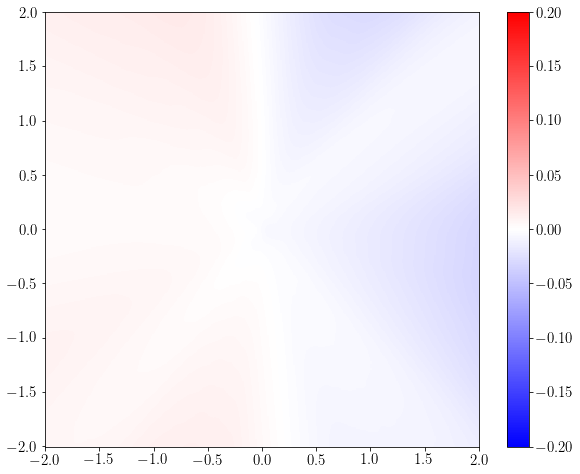

In [85]:
plt.figure(figsize = (10, 8))
avg_mse = avg_lr(get_preds(mse_lrs, xs = g))[0]
dd = (avg_mse - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

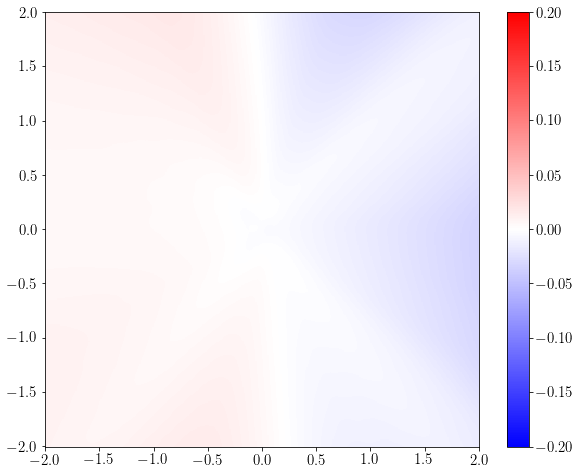

In [86]:
plt.figure(figsize = (10, 8))
avg_mlc = avg_lr(get_preds(mlc_lrs, xs = g))[0]
dd = (avg_mlc - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

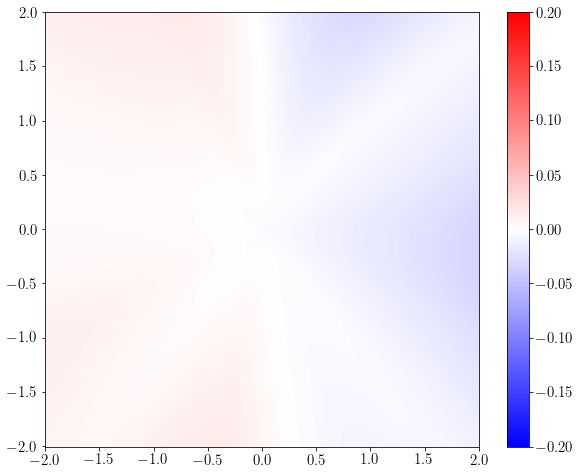

In [87]:
plt.figure(figsize = (10, 8))
avg_sqr = avg_lr(get_preds(sqr_lrs, xs = g))[0]
dd = (avg_sqr - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 1

### Load

In [88]:
# Test 1
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 1

filestr = 'models/multivariate/scratch/set_' + str(num)
bce_filestr = filestr + '/bce/model_{}.h5'
mse_filestr = filestr + '/mse/model_{}.h5'
mlc_filestr = filestr + '/mlc/model_{}.h5'
sqr_filestr = filestr + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

m = np.load(filestr + '/m.npy')
s = np.load(filestr + '/s.npy')

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model, m, s)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model, m, s)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model, m, s)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model, m, s)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

In [89]:
min(lr(h)), max(lr(h))

(0.9985867859663894, 1.0)

### MAE

In [32]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.010479002878249544
MSE:	 0.010399340975998806
MLC:	 0.010889691745450188
SQR:	 0.01078843759701979


### Plots

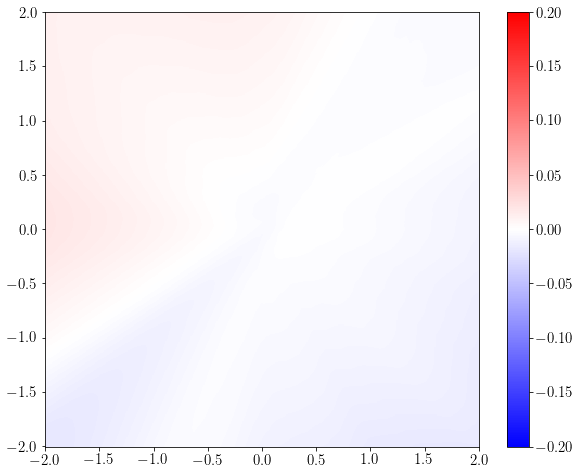

In [90]:
plt.figure(figsize = (10, 8))
avg_bce = avg_lr(get_preds(bce_lrs, xs = g))[0]
dd = (avg_bce - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

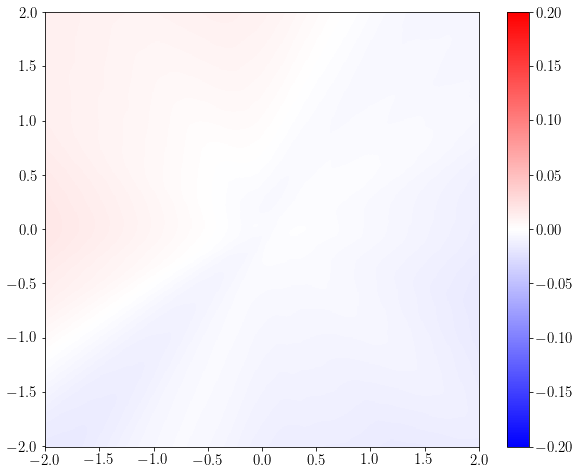

In [91]:
plt.figure(figsize = (10, 8))
avg_mse = avg_lr(get_preds(mse_lrs, xs = g))[0]
dd = (avg_mse - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

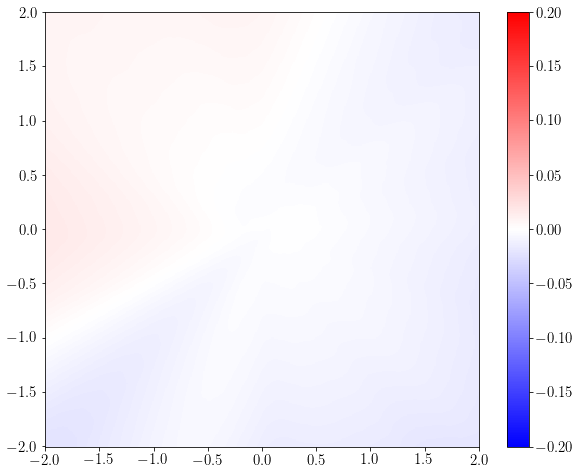

In [92]:
plt.figure(figsize = (10, 8))
avg_mlc = avg_lr(get_preds(mlc_lrs, xs = g))[0]
dd = (avg_mlc - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

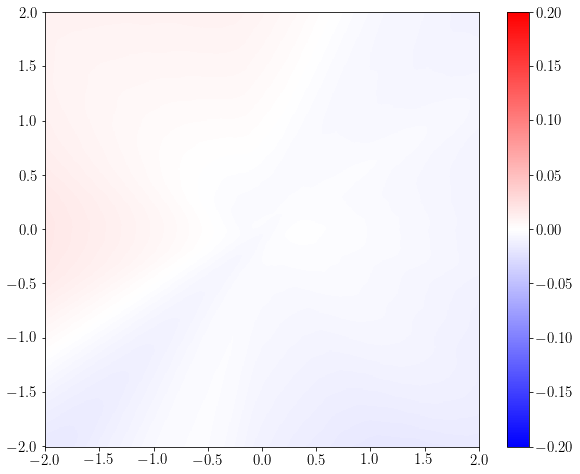

In [93]:
plt.figure(figsize = (10, 8))
avg_sqr = avg_lr(get_preds(sqr_lrs, xs = g))[0]
dd = (avg_sqr - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 2

### Load

In [94]:
# Test 2
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 2

filestr = 'models/multivariate/scratch/set_' + str(num)
bce_filestr = filestr + '/bce/model_{}.h5'
mse_filestr = filestr + '/mse/model_{}.h5'
mlc_filestr = filestr + '/mlc/model_{}.h5'
sqr_filestr = filestr + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

m = np.load(filestr + '/m.npy')
s = np.load(filestr + '/s.npy')

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model, m, s)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model, m, s)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model, m, s)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model, m, s)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

In [95]:
min(lr(h)), max(lr(h))

(0.20001701932291158, 0.20202217316932225)

### MAE

In [43]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.0714272200940281
MSE:	 0.06747321258740901
MLC:	 0.06210640036603801
SQR:	 0.0702585752791425


### Plots

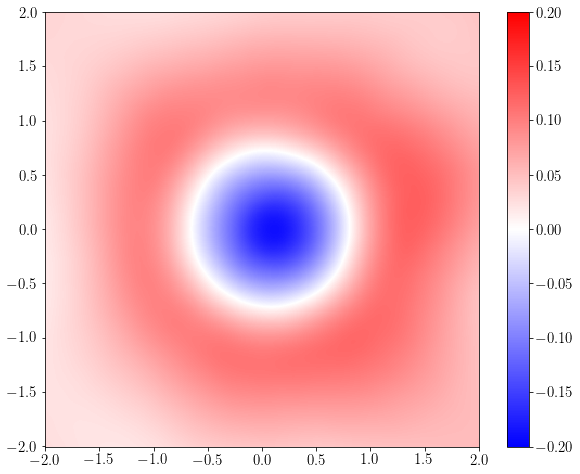

In [96]:
plt.figure(figsize = (10, 8))
avg_bce = avg_lr(get_preds(bce_lrs, xs = g))[0]
dd = (avg_bce - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

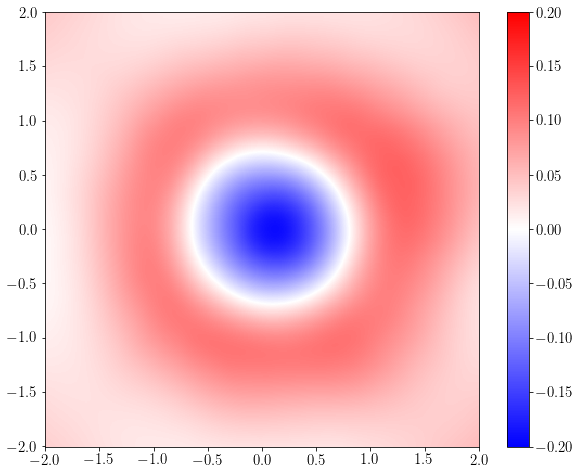

In [97]:
plt.figure(figsize = (10, 8))
avg_mse = avg_lr(get_preds(mse_lrs, xs = g))[0]
dd = (avg_mse - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

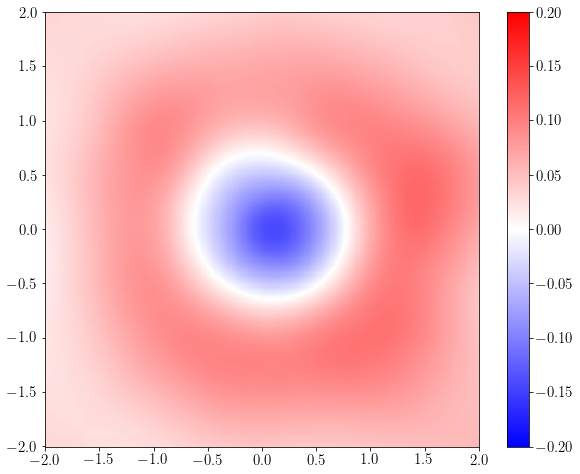

In [98]:
plt.figure(figsize = (10, 8))
avg_mlc = avg_lr(get_preds(mlc_lrs, xs = g))[0]
dd = (avg_mlc - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

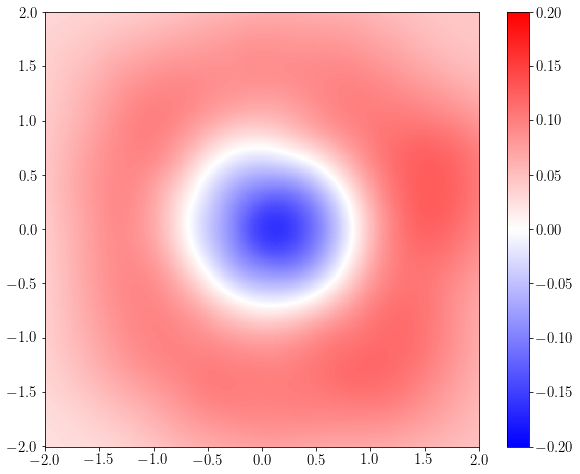

In [99]:
plt.figure(figsize = (10, 8))
avg_sqr = avg_lr(get_preds(sqr_lrs, xs = g))[0]
dd = (avg_sqr - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 3

### Load

In [100]:
# Test 3
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 3

filestr = 'models/multivariate/scratch/set_' + str(num)
bce_filestr = filestr + '/bce/model_{}.h5'
mse_filestr = filestr + '/mse/model_{}.h5'
mlc_filestr = filestr + '/mlc/model_{}.h5'
sqr_filestr = filestr + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl)

m = np.load(filestr + '/m.npy')
s = np.load(filestr + '/s.npy')

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model, m, s)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model, m, s)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model, m, s)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model, m, s)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

In [101]:
min(lr(h)), max(lr(h))

(0.7316339195659972, 0.738968488258944)

### MAE

In [53]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.569930573431202
MSE:	 0.6079486809597454
MLC:	 0.47399662686462213
SQR:	 0.538119584610951


### Plots

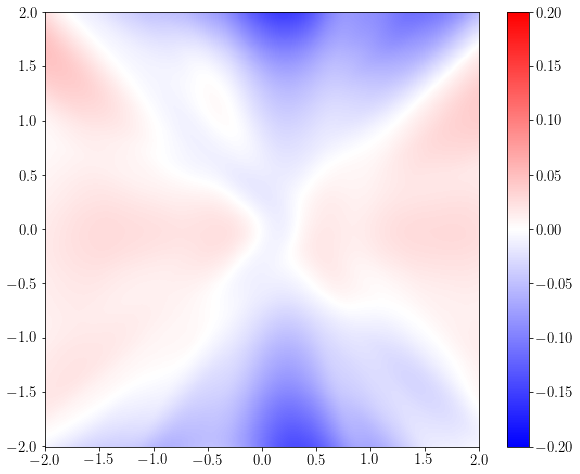

In [102]:
plt.figure(figsize = (10, 8))
avg_bce = avg_lr(get_preds(bce_lrs, xs = g))[0]
dd = (avg_bce - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

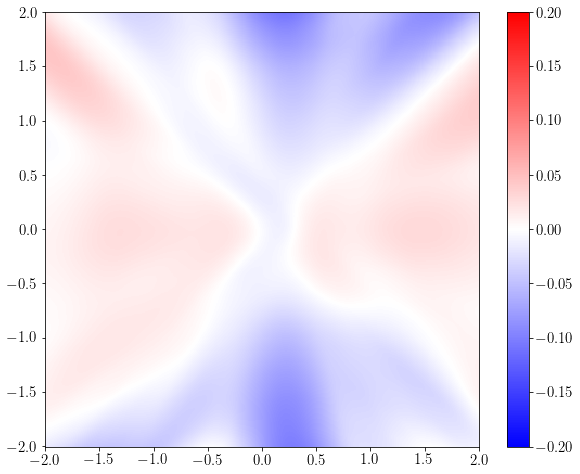

In [103]:
plt.figure(figsize = (10, 8))
avg_mse = avg_lr(get_preds(mse_lrs, xs = g))[0]
dd = (avg_mse - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

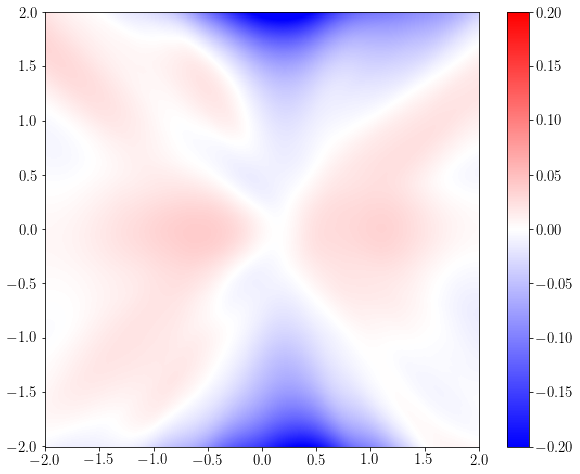

In [104]:
plt.figure(figsize = (10, 8))
avg_mlc = avg_lr(get_preds(mlc_lrs, xs = g))[0]
dd = (avg_mlc - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

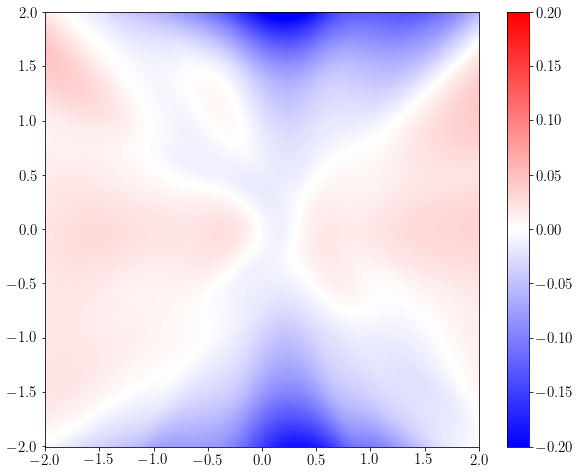

In [105]:
plt.figure(figsize = (10, 8))
avg_sqr = avg_lr(get_preds(sqr_lrs, xs = g))[0]
dd = (avg_sqr - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 4

### Load

In [106]:
# Test 4
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 4

filestr = 'models/multivariate/scratch/set_' + str(num)
bce_filestr = filestr + '/bce/model_{}.h5'
mse_filestr = filestr + '/mse/model_{}.h5'
mlc_filestr = filestr + '/mlc/model_{}.h5'
sqr_filestr = filestr + '/sqr/model_{}.h5'

m = np.load(filestr + '/m.npy')
s = np.load(filestr + '/s.npy')

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model, m, s)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model, m, s)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model, m, s)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model, m, s)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

In [107]:
min(lr(h)), max(lr(h))

(0.28975785793616154, 0.2912572484305336)

### MAE

In [68]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.043030516255188535
MSE:	 0.04440254561525347
MLC:	 0.03992232302976662
SQR:	 0.042808305633495164


### Plots

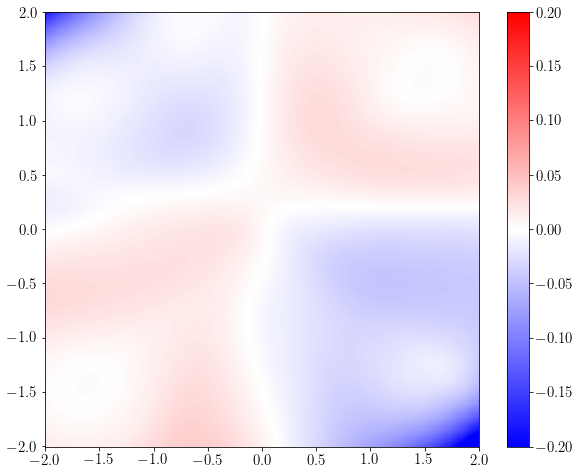

In [108]:
plt.figure(figsize = (10, 8))
avg_bce = avg_lr(get_preds(bce_lrs, xs = g))[0]
dd = (avg_bce - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

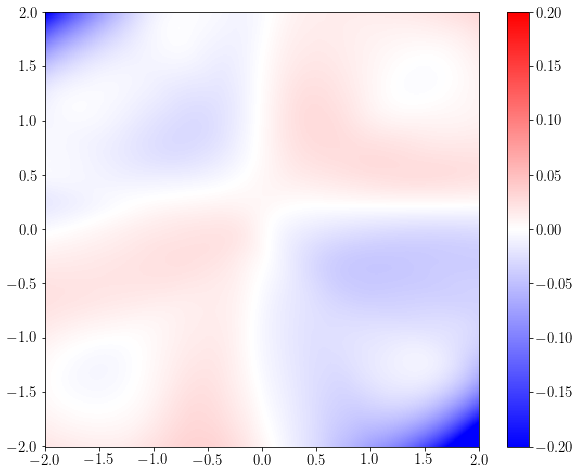

In [109]:
plt.figure(figsize = (10, 8))
avg_mse = avg_lr(get_preds(mse_lrs, xs = g))[0]
dd = (avg_mse - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

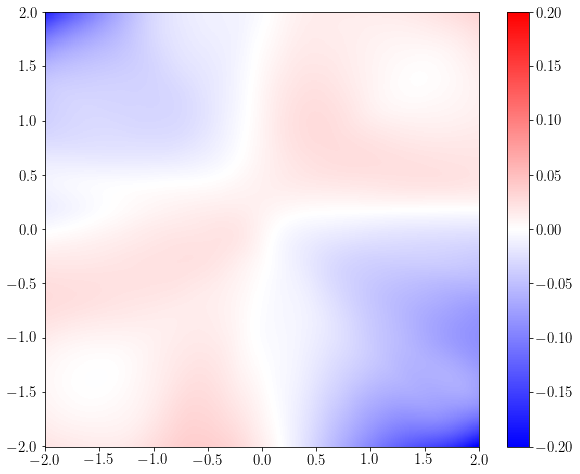

In [110]:
plt.figure(figsize = (10, 8))
avg_mlc = avg_lr(get_preds(mlc_lrs, xs = g))[0]
dd = (avg_mlc - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

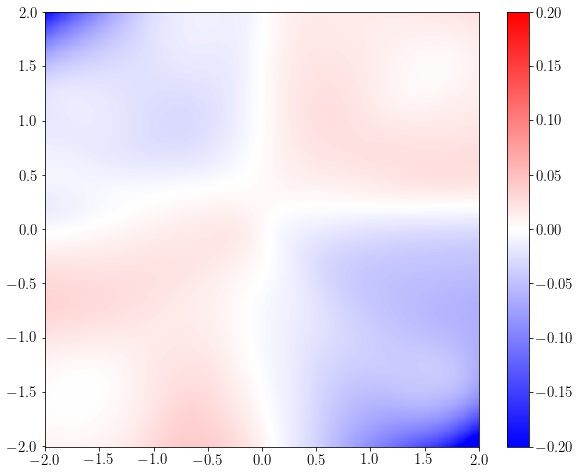

In [111]:
plt.figure(figsize = (10, 8))
avg_sqr = avg_lr(get_preds(sqr_lrs, xs = g))[0]
dd = (avg_sqr - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')